# EDA

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
import seaborn as sns 
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler , OneHotEncoder,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn import set_config

In [2]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [3]:
ames_train=pd.read_csv('../datasets/clean_ames_train.csv')
ames_test=pd.read_csv('../datasets/clean_ames_test.csv')

In [6]:
pd.DataFrame(ames_train['saleprice'].describe())

,saleprice
count,2051.000000
mean,181469.701609
std,79258.659352
min,12789.000000
25%,129825.000000
50%,162500.000000
75%,214000.000000
max,611657.000000


In [9]:
ames_train['saleprice'].median()

162500.0

Text(0, 0.5, 'SalePrice')

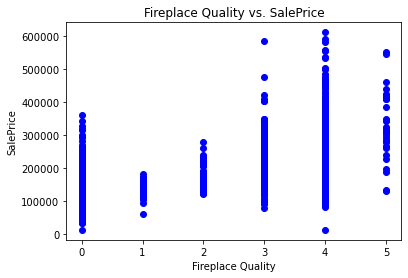

In [17]:
plt.scatter(data= ames_train, x='fireplace_qu',y='saleprice',color='blue')
plt.title("Fireplace Quality vs. SalePrice")
plt.xlabel("Fireplace Quality")
plt.ylabel('SalePrice')

Text(0, 0.5, 'Saleprice')

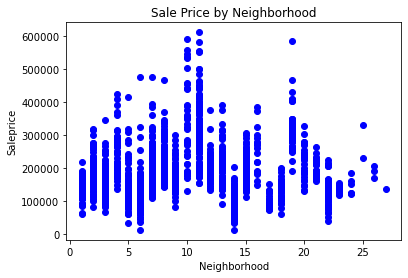

In [16]:
plt.scatter(data= ames_train, x='neighborhood',y='saleprice',color='blue')
plt.title("Sale Price by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel('Saleprice')

Text(0, 0.5, 'Saleprice')

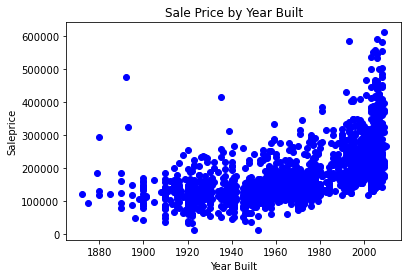

In [24]:
plt.scatter(data= ames_train, x='year_built',y='saleprice',color='blue')
plt.title("Sale Price by Year Built")
plt.xlabel("Year Built")
plt.ylabel('Saleprice')

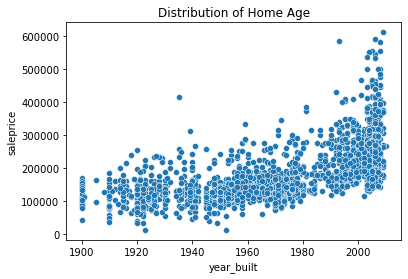

In [32]:
#pre 1900 homes are clearly outliers
mask=(ames_train["year_built"] < 1900)
ames_train.drop(ames_train[mask].index, inplace=True)
plt.figsize=((15, 15))
plt.title('Distribution of Home Age')
sns.scatterplot(data=ames_train, x="year_built",y="saleprice");

<AxesSubplot:title={'center':'Distribution of Sale Price'}, xlabel='saleprice', ylabel='Count'>

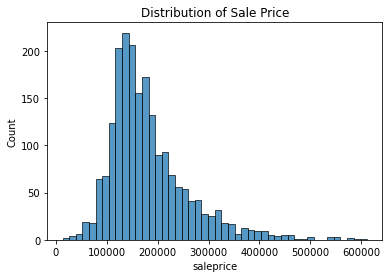

In [36]:
plt.title('Distribution of Sale Price')
sns.histplot(data=ames_train,x=ames_train["saleprice"])

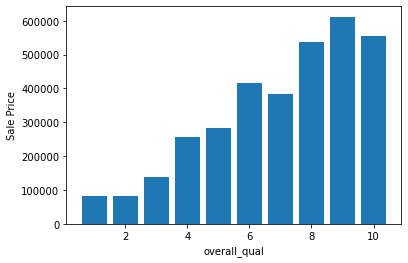

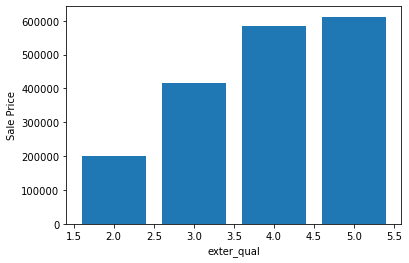

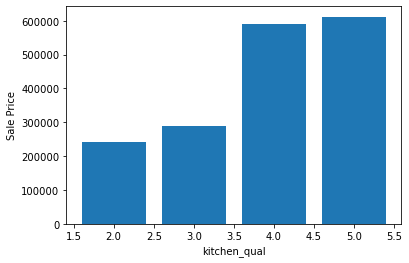

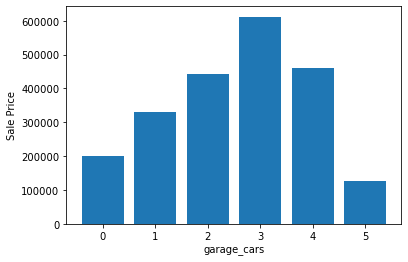

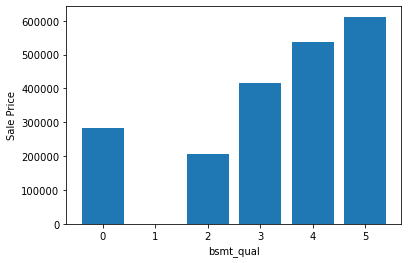

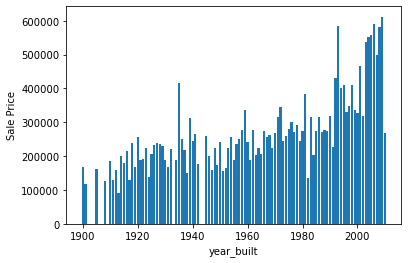

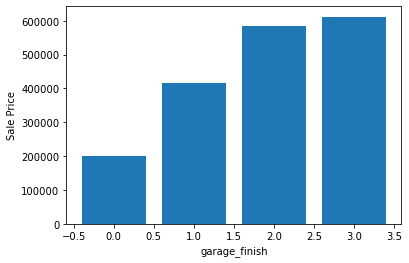

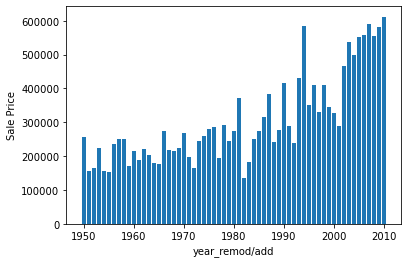

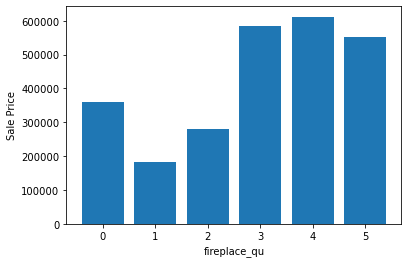

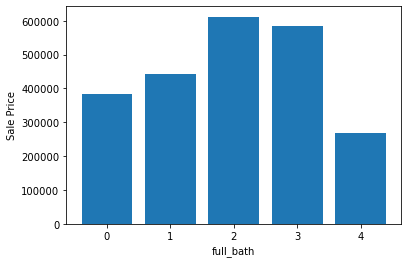

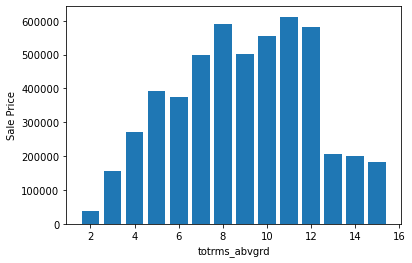

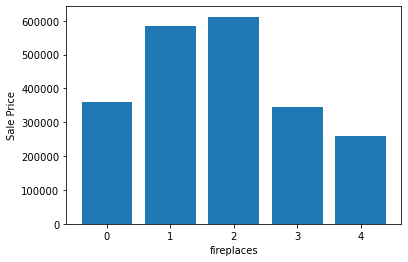

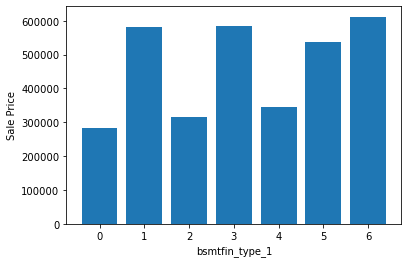

In [38]:
core_columns=['overall_qual','exter_qual',	
'kitchen_qual',
'garage_cars',
'bsmt_qual',
'year_built',
'garage_finish',
'year_remod/add',
'fireplace_qu',
'full_bath',
'totrms_abvgrd',
'fireplaces',
'bsmtfin_type_1']

for column in core_columns:
    plt.bar(ames_train[column], ames_train['saleprice'])
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.show()